# **Chapter 3. Python 을 활용한 데이터 전처리** 





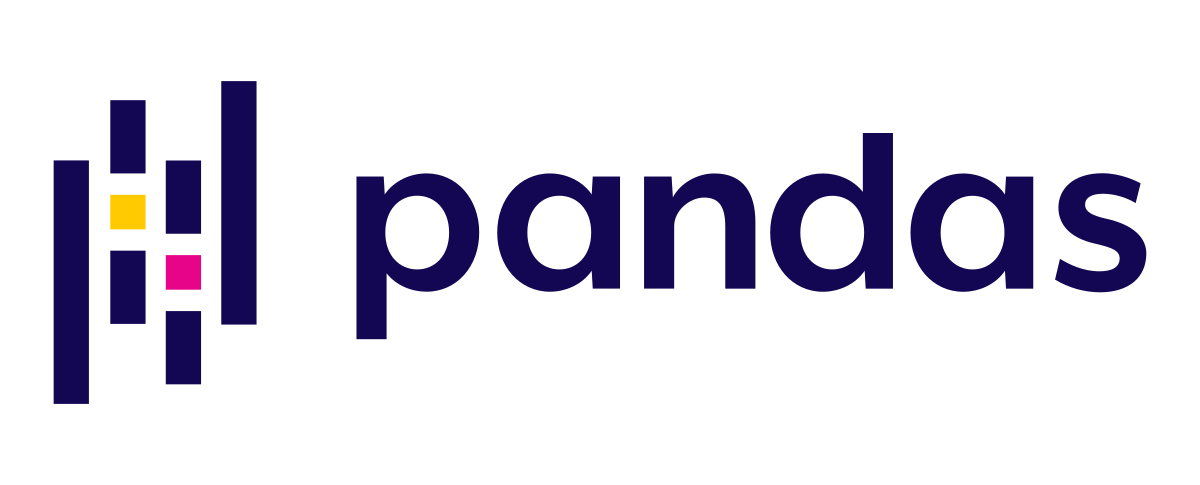


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> **3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby)** <br>
> 3-9. 데이터 합치기 (Join 과 Merge) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby)

In [1]:
# 라이브러리 임포트
import pandas as pd

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
# 상위 200개 정보 중 키나 몸무게가 0이 아닌 값만 사용
df = df.iloc[:,1:11].head(200)
df


Stage Name           Full Name Korean Name K. Stage Name Date of Birth  \
0      Taeyeon         Kim Taeyeon         김태연            태연    1989-03-09   
1        Sunny          Lee Sunkyu         이순규            써니    1989-05-15   
2      Tiffany       Hwang Miyoung         황미영           티파니    1989-08-01   
3      Hyoyeon         Kim Hyoyeon         김효연            효연    1989-09-22   
4         Yuri           Kwon Yuri         권유리            유리    1989-12-05   
..         ...                 ...         ...           ...           ...   
195    Dayoung         Kim Dayoung         김다영            다영    1991-02-02   
196       Giru           Park Giru         박기루            기루    1991-08-14   
197       Tina  Christine Joy Park   크리스틴 조이 박            티나    1994-09-01   
198      Yeeun         Hwang Yeeun         황예은            예은    1997-01-12   
199   Minyoung        Kim Minyeong         김민영            민영    1990-09-12   

           Group      Country Second Country  Height  Weight  
0           SNSD  South Korea            NaN     160      44  
1           SNSD  South Korea            NaN     158      43  
2           SNSD  South Korea            USA     163      50  
3           SNSD  South Korea            NaN     158      48  
4           SNSD  South Korea            NaN     167      45  
..           ...          ...            ...     ...     ...  
195        Blady  South Korea            NaN       0       0  
196        Blady  South Korea            NaN       0       0  
197        Blady          USA    South Korea       0       0  
198        Blady  South Korea            NaN       0       0  
199  Brave Girls  South Korea            NaN       0       0  

[200 rows x 10 columns]

In [4]:
df = df.loc[(df['Height']!=0)&(df['Weight']!=0)].dropna(subset=['Group'], axis=0).reset_index(drop=True)
df

Stage Name          Full Name Korean Name K. Stage Name Date of Birth  \
0     Taeyeon        Kim Taeyeon         김태연            태연    1989-03-09   
1       Sunny         Lee Sunkyu         이순규            써니    1989-05-15   
2     Tiffany      Hwang Miyoung         황미영           티파니    1989-08-01   
3     Hyoyeon        Kim Hyoyeon         김효연            효연    1989-09-22   
4        Yuri          Kwon Yuri         권유리            유리    1989-12-05   
5    Sooyoung      Choi Sooyoung         최수영            수영    1990-02-10   
6       Yoona           Im Yoona         임윤아            윤아    1990-05-30   
7     Seohyun        Seo Joohyun         서주현            서현    1991-06-28   
8        Yuna           Seo Yuna         서유나            유나    1992-12-30   
9    Hyejeong      Shin Hyejeong         신혜정            혜정    1993-08-10   
10   Seolhyun       Kim Seolhyun         김설현            설현    1995-01-03   
11     Chanmi         Kim Chanmi         김찬미            찬미    1996-06-19   
12      Sojin         Park Sojin         박소진            소진    1986-05-21   
13       Yura        Kim Ahyoung         김아영            유라    1992-11-06   
14      Minah         Bang Minah         방민아            민아    1993-05-13   
15      Hyeri          Lee Hyeri         이혜리            혜리    1994-06-09   
16     Sungah         Son Sungah         손성아            성아    1989-07-08   
17    Kyungri       Park Kyungri         박경리            경리    1990-07-05   
18      Hyemi          Pyo Hyemi         표혜미            혜미    1991-04-03   
19      Sojin           Jo Sojin         조소진            소진    1991-10-11   
20     Keumjo         Lee Keumjo         이금조            금조    1992-12-17   
21   Victoria          Song Qian         송치엔          빅토리아    1987-02-02   
22    Nayoung        Kim Nayoung         김나영            나영    1995-11-23   
23    Sejeong        Kim Sejeong         김세정            세정    1996-08-28   
24       Mina          Kang Mina         강미나            미나    1999-12-04   
25    Hyojung       Choi Hyojung         최효정            효정    1994-07-28   
26       Mimi         Kim Mihyun         김미현            미미    1995-05-01   
27       Yooa           Yoo Siah         유시아            유아    1995-09-17   
28   Seunghee      Hyun Seunghee         현승희            승희    1996-01-25   
29       Jiho           Kim Jiho         김지호            지호    1997-04-04   
30     Binnie          Bae Yubin         배유빈            비니    1997-09-09   
31       Arin         Choi Yewon         최예원            아린    1999-06-18   
32   Babysoul        Lee Soojung         이수정         베이비소울    1992-07-06   
33       Jiae           Yoo Jiae         유지애            지애    1993-05-21   
34      Jisoo          Seo Jisoo         서지수            지수    1994-02-11   
35      Mijoo          Lee Mijoo         이미주            미주    1994-09-23   
36        Kei         Kim Jiyeon         김지연            케이    1995-03-20   
37        JIN      Park Myungeun         박명은             진    1996-06-12   
38    Sujeong        Ryu Sujeong         류수정            수정    1997-11-19   
39     Soyeon        Jung Soyeon         정소연            소연    1994-05-04   
40         ZN          Bae Jinye         배진예            지엔    1994-06-09   
41      Haein         Yeom Haein         염해인            해인    1995-05-19   
42     Solbin         Ahn Solbin         안솔빈            솔빈    1997-08-19   
43        Qri         Lee Jihyun         이지현            큐리    1986-12-12   
44    Eunjung        Ham Eunjung         함은정            은정    1988-12-12   
45     Hyomin      Park Sunyoung         박선영            효민    1989-05-30   
46     Jiyeon        Park Jiyeon         박지연            지연    1993-06-07   
47      Solar        Kim Yongsun         김용선            솔라    1991-02-21   
48   Moonbyul        Moon Byulyi         문별이            문별    1992-12-22   
49     Wheein        Jung Wheein         정휘인            휘인    1995-04-17   
50      Hwasa         Ahn Hyejin         안혜진            화사    1995-07-23   
51     Eunbin        Kwon Eunbin         권은빈       

In [5]:
len(df)

55

> ###  **3-8-1. 피벗 테이블 (pivot_table)**


> **피벗 테이블(pivot table)**
> - 피벗 테이블은 **방대한 표(예: 데이터베이스, 스프레드 시트, 비즈니스 인텔리전스 프로그램 등)의 데이터를 요약하는 통계 표** 입니다.
> - 이 요약에는 합계, 평균, 기타 통계가 포함될 수 있으며, **우리가 원하는 방식으로 묶거나 정렬**할 수 있습니다.
> - **엑셀에서 사용되는 피벗 테이블과 동일**한 개념입니다.
> - ps. 마이크로소프트는 피벗테이블(PivotTable) 을 1994년 미국에서 상표로 등록했습니다.
> - 기본 사용법
    - **`pd.pivot_table(df, index = '행 인덱스', columns = '열 인덱스', values = '조회하고 싶은 값', aggfunc='집계 방식')`**


In [6]:
# 코드를 입력해 주세요
df.head()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

In [7]:
# index = '행 인덱스', columns = '열 인덱스', values = '조회하고 싶은 값', aggfunc = '집계방식(기본값은 평균)'
pd.pivot_table(df, index='Group', columns='Country', values='Height', aggfunc='mean')

Country     China  South Korea  Thailand
Group                                   
9Muses        NaN   170.000000       NaN
AoA           NaN   166.500000       NaN
BLACKPINK     NaN   162.500000     170.0
CLC           NaN   167.000000       NaN
Girl's Day    NaN   166.750000       NaN
Gugudan       NaN   165.000000       NaN
LABOUM        NaN   165.250000       NaN
Lovelyz       NaN   164.000000       NaN
Mamamoo       NaN   163.000000       NaN
Oh My Girl    NaN   161.714286       NaN
SNSD          NaN   163.750000       NaN
T-ara         NaN   165.750000       NaN
f(x)        168.0          NaN       NaN

In [8]:
# index = '행 인덱스', columns = '열 인덱스', values = '조회하고 싶은 값', aggfunc = '집계방식(기본값은 평균)'
pd.pivot_table(df, index='Group', columns='Country', values='Height', aggfunc='sum')

Country     China  South Korea  Thailand
Group                                   
9Muses        NaN        850.0       NaN
AoA           NaN        666.0       NaN
BLACKPINK     NaN        325.0     170.0
CLC           NaN        167.0       NaN
Girl's Day    NaN        667.0       NaN
Gugudan       NaN        495.0       NaN
LABOUM        NaN        661.0       NaN
Lovelyz       NaN       1148.0       NaN
Mamamoo       NaN        652.0       NaN
Oh My Girl    NaN       1132.0       NaN
SNSD          NaN       1310.0       NaN
T-ara         NaN        663.0       NaN
f(x)        168.0          NaN       NaN

In [9]:
# index = '행 인덱스', columns = '열 인덱스', values = '조회하고 싶은 값', aggfunc = '집계방식(기본값은 평균)'
pd.pivot_table(df, index='Group', columns='Country', values='Height', aggfunc='count')

Country     China  South Korea  Thailand
Group                                   
9Muses        NaN          5.0       NaN
AoA           NaN          4.0       NaN
BLACKPINK     NaN          2.0       1.0
CLC           NaN          1.0       NaN
Girl's Day    NaN          4.0       NaN
Gugudan       NaN          3.0       NaN
LABOUM        NaN          4.0       NaN
Lovelyz       NaN          7.0       NaN
Mamamoo       NaN          4.0       NaN
Oh My Girl    NaN          7.0       NaN
SNSD          NaN          8.0       NaN
T-ara         NaN          4.0       NaN
f(x)          1.0          NaN       NaN

> ###  **3-8-2. 그룹 통계 (groupby)**


> **그룹으로 묶기(groupby)**
> - 그룹으로 묶기(groupby) 는 피벗 테이블과 유사한 개념으로, **같은 값을 그룹으로 묶어서 분석**할 때 사용합니다.
> - 그룹으로 **묶는기준 (예: 성별, 나이, 혈액형 등) 에 따라 합계, 평균, 분산, 최대/최소 값 등 그룹 통계를 구할 수 있습니다.**
> - 기본 사용법  
    - **`df.groupby('그룹 구분').count()`** - 갯수  
    - **`df.groupby('그룹 구분').sum()`** - 합계  
    - **`df.groupby('그룹 구분').mean()`** - 평균  
    - **`df.groupby('그룹 구분').var()`** - 분산  
    - **`df.groupby('그룹 구분').std()`** - 표준편차  
    - **`df.groupby('그룹 구분').min()/.max()`** - 최대/최소값  

In [10]:
# 코드를 입력해 주세요
df.head()

Stage Name      Full Name Korean Name K. Stage Name Date of Birth Group  \
0    Taeyeon    Kim Taeyeon         김태연            태연    1989-03-09  SNSD   
1      Sunny     Lee Sunkyu         이순규            써니    1989-05-15  SNSD   
2    Tiffany  Hwang Miyoung         황미영           티파니    1989-08-01  SNSD   
3    Hyoyeon    Kim Hyoyeon         김효연            효연    1989-09-22  SNSD   
4       Yuri      Kwon Yuri         권유리            유리    1989-12-05  SNSD   

       Country Second Country  Height  Weight  
0  South Korea            NaN     160      44  
1  South Korea            NaN     158      43  
2  South Korea            USA     163      50  
3  South Korea            NaN     158      48  
4  South Korea            NaN     167      45

> **단일 그룹 지정**

In [11]:
df.groupby('Group').mean(numeric_only=True)

Height     Weight
Group                            
9Muses      170.000000  47.800000
AoA         166.500000  46.750000
BLACKPINK   165.000000  47.000000
CLC         167.000000  48.000000
Girl's Day  166.750000  47.250000
Gugudan     165.000000  48.666667
LABOUM      165.250000  47.250000
Lovelyz     164.000000  45.571429
Mamamoo     163.000000  43.750000
Oh My Girl  161.714286  48.428571
SNSD        163.750000  46.625000
T-ara       165.750000  44.750000
f(x)        168.000000  45.000000

In [12]:
df.groupby('Group').sum(numeric_only=True)

Height  Weight
Group                     
9Muses         850     239
AoA            666     187
BLACKPINK      495     141
CLC            167      48
Girl's Day     667     189
Gugudan        495     146
LABOUM         661     189
Lovelyz       1148     319
Mamamoo        652     175
Oh My Girl    1132     339
SNSD          1310     373
T-ara          663     179
f(x)           168      45

In [13]:
df.groupby('Group')['Height'].mean()

Group
9Muses        170.000000
AoA           166.500000
BLACKPINK     165.000000
CLC           167.000000
Girl's Day    166.750000
Gugudan       165.000000
LABOUM        165.250000
Lovelyz       164.000000
Mamamoo       163.000000
Oh My Girl    161.714286
SNSD          163.750000
T-ara         165.750000
f(x)          168.000000
Name: Height, dtype: float64

> **여러 개 그룹 지정**

In [ ]:
df.groupby(['Group', 'Country']).mean(numeric_only=True)

Height     Weight
Group      Country                           
9Muses     South Korea  170.000000  47.800000
AoA        South Korea  166.500000  46.750000
BLACKPINK  South Korea  162.500000  47.500000
           Thailand     170.000000  46.000000
CLC        South Korea  167.000000  48.000000
Girl's Day South Korea  166.750000  47.250000
Gugudan    South Korea  165.000000  48.666667
LABOUM     South Korea  165.250000  47.250000
Lovelyz    South Korea  164.000000  45.571429
Mamamoo    South Korea  163.000000  43.750000
Oh My Girl South Korea  161.714286  48.428571
SNSD       South Korea  163.750000  46.625000
T-ara      South Korea  165.750000  44.750000
f(x)       China        168.000000  45.000000

In [17]:
# 인덱스 분할 (reset_index())
df.groupby(['Group', 'Country']).mean(numeric_only=True).reset_index()

Group      Country      Height     Weight
0       9Muses  South Korea  170.000000  47.800000
1          AoA  South Korea  166.500000  46.750000
2    BLACKPINK  South Korea  162.500000  47.500000
3    BLACKPINK     Thailand  170.000000  46.000000
4          CLC  South Korea  167.000000  48.000000
5   Girl's Day  South Korea  166.750000  47.250000
6      Gugudan  South Korea  165.000000  48.666667
7       LABOUM  South Korea  165.250000  47.250000
8      Lovelyz  South Korea  164.000000  45.571429
9      Mamamoo  South Korea  163.000000  43.750000
10  Oh My Girl  South Korea  161.714286  48.428571
11        SNSD  South Korea  163.750000  46.625000
12       T-ara  South Korea  165.750000  44.750000
13        f(x)        China  168.000000  45.000000

> **그룹 데이터 확인 (`get_group()`)**

In [18]:
df.groupby('Group')

In [ ]:
# 그룹 키를 해당 그룹에 속한 행의 정수 인덱스 목록을 dict으로 반환
df.groupby('Group').groups

{'9Muses': [16, 17, 18, 19, 20], 'AoA': [8, 9, 10, 11], 'BLACKPINK': [52, 53, 54], 'CLC': [51], 'Girl's Day': [12, 13, 14, 15], 'Gugudan': [22, 23, 24], 'LABOUM': [39, 40, 41, 42], 'Lovelyz': [32, 33, 34, 35, 36, 37, 38], 'Mamamoo': [47, 48, 49, 50], 'Oh My Girl': [25, 26, 27, 28, 29, 30, 31], 'SNSD': [0, 1, 2, 3, 4, 5, 6, 7], 'T-ara': [43, 44, 45, 46], 'f(x)': [21]}

In [18]:
df.groupby('Group').get_group('BLACKPINK')

Stage Name          Full Name Korean Name K. Stage Name Date of Birth  \
52      Jisoo          Kim Jisoo         김지수            지수    1995-01-03   
53     Jennie         Kim Jennie         김제니            제니    1996-01-16   
54       Lisa  Pranpriya Manoban   쁘란쁘리야 마노반            리사    1997-03-27   

        Group      Country Second Country  Height  Weight  
52  BLACKPINK  South Korea            NaN     162      45  
53  BLACKPINK  South Korea            NaN     163      50  
54  BLACKPINK     Thailand            NaN     170      46

> **(+알파) : 그룹 집계 방식 구분하기 (`agg()`)**  

In [19]:
df.groupby('Group').mean(numeric_only=True)

Height     Weight
Group                            
9Muses      170.000000  47.800000
AoA         166.500000  46.750000
BLACKPINK   165.000000  47.000000
CLC         167.000000  48.000000
Girl's Day  166.750000  47.250000
Gugudan     165.000000  48.666667
LABOUM      165.250000  47.250000
Lovelyz     164.000000  45.571429
Mamamoo     163.000000  43.750000
Oh My Girl  161.714286  48.428571
SNSD        163.750000  46.625000
T-ara       165.750000  44.750000
f(x)        168.000000  45.000000

In [20]:
df.groupby('Group').agg({'Height': 'mean', 'Weight' : 'sum'})

Height  Weight
Group                         
9Muses      170.000000     239
AoA         166.500000     187
BLACKPINK   165.000000     141
CLC         167.000000      48
Girl's Day  166.750000     189
Gugudan     165.000000     146
LABOUM      165.250000     189
Lovelyz     164.000000     319
Mamamoo     163.000000     175
Oh My Girl  161.714286     339
SNSD        163.750000     373
T-ara       165.750000     179
f(x)        168.000000      45

In [21]:
df.groupby('Group').agg({'Height': 'mean', 'Weight' : 'sum'}).round(2)

Height  Weight
Group                     
9Muses      170.00     239
AoA         166.50     187
BLACKPINK   165.00     141
CLC         167.00      48
Girl's Day  166.75     189
Gugudan     165.00     146
LABOUM      165.25     189
Lovelyz     164.00     319
Mamamoo     163.00     175
Oh My Girl  161.71     339
SNSD        163.75     373
T-ara       165.75     179
f(x)        168.00      45